Descrição do modelo: Modelo S with data augmentation e com o otimizador SGD

In [1]:
import os, shutil
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {‘0’, ‘1’, ‘2’}
train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test'
train_airplane_dir = 'train/000_airplane'
train_automobile_dir = 'train/001_automobile'
train_bird_dir = 'train/002_bird'
train_cat_dir = 'train/003_cat'
train_deer_dir = 'train/004_deer'
train_dog_dir = 'train/005_dog'
train_frog_dir = 'train/006_frog'
train_horse_dir = 'train/007_horse'
train_ship_dir = 'train/008_ship'
train_truck_dir = 'train/009_truck'

validation_airplane_dir = 'validation/000_airplane'
validation_automobile_dir = 'validation/001_automobile'
validation_bird_dir = 'validation/002_bird'
validation_cat_dir = 'validation/003_cat'
validation_deer_dir = 'validation/004_deer'
validation_dog_dir = 'validation/005_dog'
validation_frog_dir = 'validation/006_frog'
validation_horse_dir = 'validation/007_horse'
validation_ship_dir = 'validation/008_ship'
validation_truck_dir = 'validation/009_truck'

test_airplane_dir = 'test/000_airplane'
test_automobile_dir = 'test/001_automobile'
test_bird_dir = 'test/002_bird'
test_cat_dir = 'test/003_cat'
test_deer_dir = 'test/004_deer'
test_dog_dir = 'test/005_dog'
test_frog_dir = 'test/006_frog'
test_horse_dir = 'test/007_horse'
test_ship_dir = 'test/008_ship'
test_truck_dir = 'test/009_truck'


print('total training airplane images:', len(os.listdir(train_airplane_dir)))
print('total training automobile images:', len(os.listdir(train_automobile_dir)))
print('total training bird images:', len(os.listdir(train_bird_dir)))
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training deer images:', len(os.listdir(train_deer_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total training frog images:', len(os.listdir(train_frog_dir)))
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training ship images:', len(os.listdir(train_ship_dir)))
print('total training truck images:', len(os.listdir(train_truck_dir)))

print('total validation airplane images:', len(os.listdir(validation_airplane_dir)))
print('total validation automobile images:', len(os.listdir(validation_automobile_dir)))
print('total validation bird images:', len(os.listdir(validation_bird_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation deer images:', len(os.listdir(validation_deer_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))
print('total validation frog images:', len(os.listdir(validation_frog_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation ship images:', len(os.listdir(validation_ship_dir)))
print('total validation truck images:', len(os.listdir(validation_truck_dir)))

print('total test airplane images:', len(os.listdir(test_airplane_dir)))
print('total test automobile images:', len(os.listdir(test_automobile_dir)))
print('total test bird images:', len(os.listdir(test_bird_dir)))
print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total test deer images:', len(os.listdir(test_deer_dir)))
print('total test dog images:', len(os.listdir(test_dog_dir)))
print('total test frog images:', len(os.listdir(test_frog_dir)))
print('total test horse images:', len(os.listdir(test_horse_dir)))
print('total test ship images:', len(os.listdir(test_ship_dir)))
print('total test truck images:', len(os.listdir(test_truck_dir)))

total training airplane images: 3995
total training automobile images: 4026
total training bird images: 3968
total training cat images: 3984
total training deer images: 4001
total training dog images: 4063
total training frog images: 3970
total training horse images: 3999
total training ship images: 3975
total training truck images: 4019
total validation airplane images: 1005
total validation automobile images: 974
total validation bird images: 1032
total validation cat images: 1016
total validation deer images: 999
total validation dog images: 937
total validation frog images: 1030
total validation horse images: 1001
total validation ship images: 1025
total validation truck images: 981
total test airplane images: 2000
total test automobile images: 2000
total test bird images: 2000
total test cat images: 2000
total test deer images: 2000
total test dog images: 2000
total test frog images: 2000
total test horse images: 2000
total test ship images: 1974
total test truck images: 2000


Usamos a variável de ambiente TF_CPP_MIN_LOG_LEVEL para reduzir o número de avisos que aparecem nos outputs por termos usado a GPU dos nossos computadores.

In [2]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 32

train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


Definição das camadas de data augmentation

In [3]:
from tensorflow import keras
from keras import layers
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)


In [4]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32, 10)


Modelo igual ao aplicado ao modelo com o otimizador Adam

In [6]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)


x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,786 (1.04 MB)

 Trainable params: 271,786 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Learning rate calculado com o optuna no ficheiro: learning_rate_calculation_optuna_SGD.ipynb

In [8]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.008542739901721545),metrics=['acc'])

In [9]:
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=10),
    keras.callbacks.ModelCheckpoint(filepath='modelS_checkpoint_sgd_withDAUG.keras',save_best_only=True,monitor='val_acc',verbose=1)
]

In [10]:
history = model.fit(train_dataset,epochs=50,validation_data=validation_dataset,callbacks=callbacks_list)

Epoch 1/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.1439 - loss: 2.2532
Epoch 1: val_acc improved from -inf to 0.25830, saving model to modelS_checkpoint_sgd_withDAUG.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - acc: 0.1440 - loss: 2.2529 - val_acc: 0.2583 - val_loss: 2.0247
Epoch 2/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2720 - loss: 1.9980
Epoch 2: val_acc improved from 0.25830 to 0.35820, saving model to modelS_checkpoint_sgd_withDAUG.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - acc: 0.2720 - loss: 1.9978 - val_acc: 0.3582 - val_loss: 1.7887
Epoch 3/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3373 - loss: 1.8341
Epoch 3: val_acc improved from 0.35820 to 0.39500, saving model to modelS_checkpoint_sgd_withDAUG.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - acc: 0.3374 - loss: 1.8340 - val_acc: 0.3950 - val_loss: 1.6876
Epoch 4/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3719 - loss: 1.7284
Epoch 4: val_acc impro

In [13]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.6288 - loss: 1.0883
val_acc: 0.6255000233650208


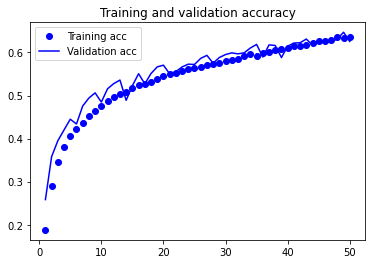

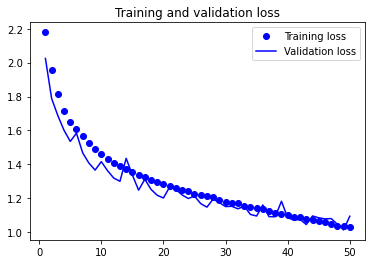

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Função para mostrar uma label com a classe pertencente à posição do vetor de resultado:

In [15]:
def class_result (result):
    for i in range(10):
        res = result[0][i].round()
        if res == 1:
            match i:
                case 0:
                    print("Airplane")
                case 1:
                    print("Automobile")
                case 2:
                    print("Bird")
                case 3:
                    print("Cat")
                case 4:
                    print("Deer")
                case 5:
                    print("Dog")
                case 6:
                    print("Frog")
                case 7:
                    print("Horse")
                case 8:
                    print("Ship")
                case 9:
                    print("Truck")
            return

    print("Unknown")

(32, 32)


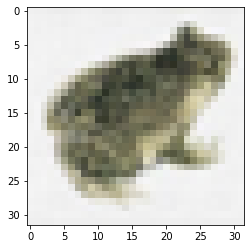

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Frog


In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
img = tf.keras.preprocessing.image.load_img('train/006_frog/alytes_obstetricans_s_000028.png', target_size=(32, 32), interpolation='bilinear')
print(img.size)
plt.imshow(img)
plt.show()
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())
class_result(result)